In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from DCA import remove_outlier, arps_fit

In [14]:
df = pd.read_excel('M-02.xlsx')
df.head()

,Date,Monthly oil production,Water Cut (%)
0,1986-10-31,30883.0,0.0
1,1986-11-30,48878.1,0.0
2,1986-12-31,50796.5,0.0
3,1987-01-31,50771.3,0.0
4,1987-02-28,45934.5,0.0


In [15]:
df = df[["Date", "Monthly oil production"]]
df.head()

,Date,Monthly oil production
0,1986-10-31,30883.0
1,1986-11-30,48878.1
2,1986-12-31,50796.5
3,1987-01-31,50771.3
4,1987-02-28,45934.5


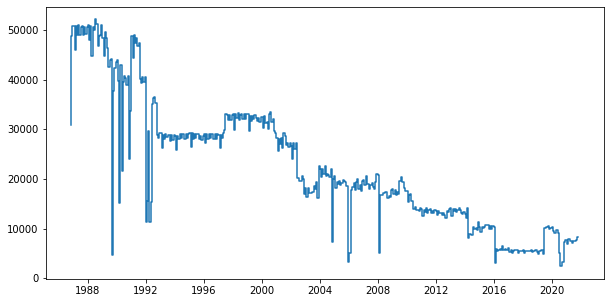

In [16]:
# Plot oil production rate
plt.figure(figsize=(10,5))
plt.step(df["Date"], df["Monthly oil production"])
plt.show()

In [17]:
df=df.set_index('Date')
df=df.assign(Date=df.index.get_level_values('Date'))
df.head()

,Monthly oil production,Date
Date,,
1986-10-31,30883.0,1986-10-31
1986-11-30,48878.1,1986-11-30
1986-12-31,50796.5,1986-12-31
1987-01-31,50771.3,1987-01-31
1987-02-28,45934.5,1987-02-28


In [22]:
start='1986-10-31'
end='2021-05-01'

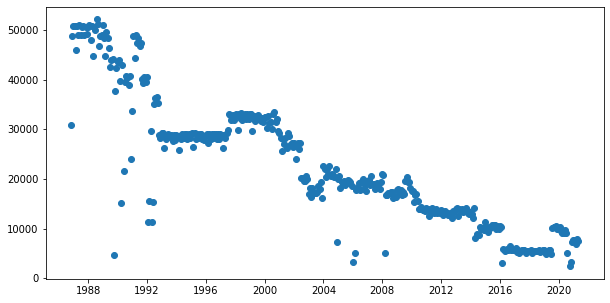

In [24]:
# Plot oil production rate
plt.figure(figsize=(10,5))
plt.scatter(df[start :end].index ,df["Monthly oil production"][start :end])
plt.show()

In [30]:
# Removing outliers (window=150, num_stdev=50)
df=df[start :end]
result = remove_outlier(df, "Monthly oil production", 50, 50, trim=False)
result.head()

,Monthly oil production,Date,Monthly oil production_rol_Av,Monthly oil production_rol_Std,Monthly oil production_is_Outlier
25,49098.2,1988-11-30,44123.242,9683.509773,False
26,51004.0,1988-12-31,44180.352,9611.986029,False
27,48418.9,1989-01-31,44180.352,9611.986029,False
28,44764.6,1989-02-28,44051.536,9564.550994,False
29,49582.5,1989-03-31,44016.440,9542.584687,False


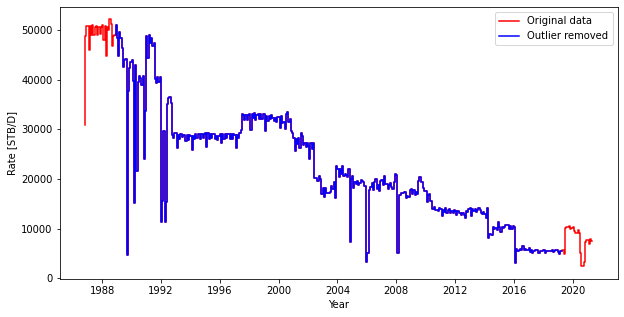

In [31]:
# Plot outlier-removed oil production rate, compare w/ original
plt.figure(figsize=(10,5))
plt.step(df.index, df["Monthly oil production"], color="red", label="Original data")
plt.step(result["Date"], result["Monthly oil production"], color="blue", label="Outlier removed")
plt.xlabel("Year"); plt.ylabel("Rate [STB/D]")

plt.legend()
plt.show()

Initial production rate (qi)  : 37000.63246 VOL/D
Initial decline rate (di)     : 0.00006 VOL/D
Decline coefficient (b)       : -1.56243
RMSE of regression            : 0.08114


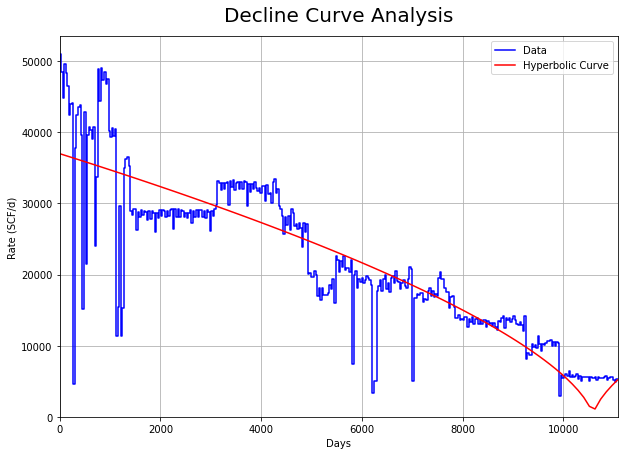

(37000.63246420114,
 6.0453480037633374e-05,
 -1.562434881635433,
 0.08114408821332234)

In [32]:
t = result["Date"]
q = result["Monthly oil production"]
# Decline curve analysis
arps_fit(t, q, plot=True)